In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.auto import tqdm
from nltk.corpus import stopwords

In [2]:
stopwords = stopwords.words('russian')
data = pd.read_csv('data.csv')

### Описательные статистики

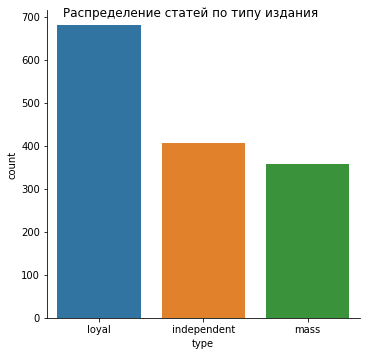

In [3]:
sns.catplot(data=data, x='type', kind='count').fig.suptitle('Распределение статей по типу издания');

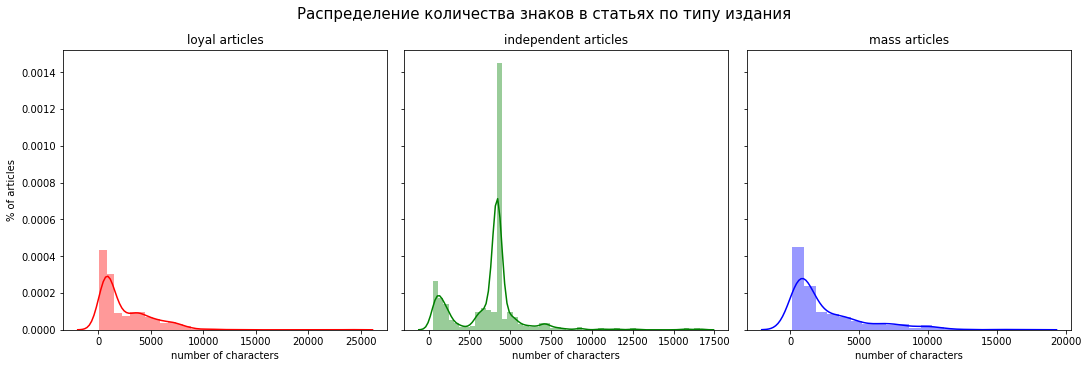

In [4]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5), constrained_layout=True)
sns.distplot(data[data['type'] == 'loyal']['content'].str.len(), color='red', ax=axes[0])
sns.distplot(data[data['type'] == 'independent']['content'].str.len(), color='green', ax=axes[1])
sns.distplot(data[data['type'] == 'mass']['content'].str.len(), color='blue', ax=axes[2])

axes[0].set(ylabel='% of articles')
axes[0].set_title('loyal articles')
axes[0].set(xlabel='number of characters')
axes[1].set_title('independent articles')
axes[1].set(xlabel='number of characters')
axes[2].set_title('mass articles')
axes[2].set(xlabel='number of characters')
fig.suptitle('Распределение количества знаков в статьях по типу издания', fontsize=15);

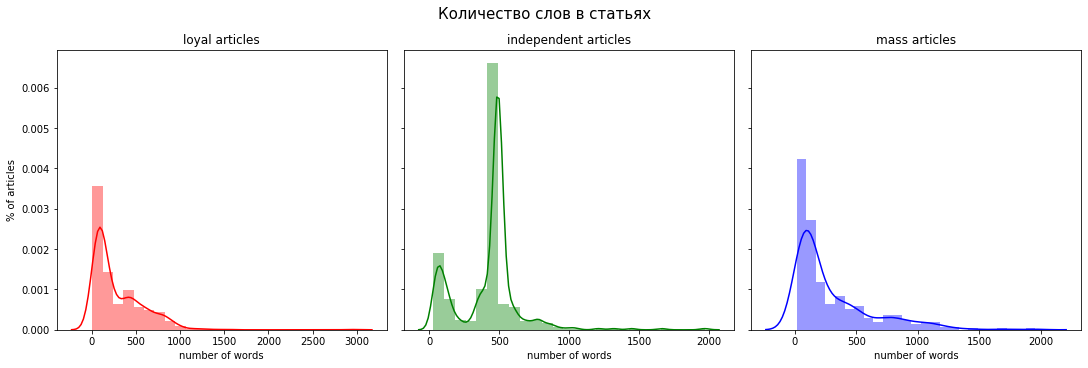

In [5]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5), constrained_layout=True)
sns.distplot(data[data['type'] == 'loyal']['content'].str.split().map(lambda x: len(x)), color='red', bins=25, ax=axes[0])
sns.distplot(data[data['type'] == 'independent']['content'].str.split().map(lambda x: len(x)), 
             color='green', bins=25, ax=axes[1])
sns.distplot(data[data['type'] == 'mass']['content'].str.split().map(lambda x: len(x)), color='blue', bins=25, ax=axes[2])

axes[0].set(ylabel='% of articles')
axes[0].set_title('loyal articles')
axes[0].set(xlabel='number of words')
axes[1].set_title('independent articles')
axes[1].set(xlabel='number of words')
axes[2].set_title('mass articles')
axes[2].set(xlabel='number of words')
fig.suptitle('Количество слов в статьях', fontsize=15);

### Preprocessing

In [6]:
def create_corpus(target):
    """
    Эта функция создаст корпус (лист) слов, встречающихся в статьях. Корпус создаётся по типу
    (лояльные, массовые, независимые) для разных классов.
    """
    corpus = []
    for x in data[data['type'] == target]['content'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

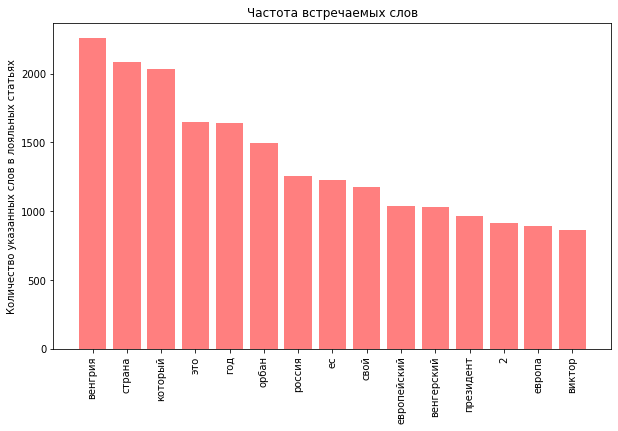

In [7]:
corpus = create_corpus('loyal') # Создаём корпус слов в лояльных изданиях

dic = defaultdict(int) # Создаём словарь с частотой упоминания слов
for word in corpus:
    dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]

x, y = zip(*top)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='red', alpha=0.5)
plt.title('Частота встречаемых слов')
plt.xticks(rotation=90)
plt.ylabel('Количество указанных слов в лояльных статьях');
# Не очень информативный пример, нужно отфильтровать стоп-слова

In [8]:
stopwords.append('2')
stopwords.append('который')
stopwords.append('это')
stopwords.append('год')
stopwords.append('свой')
stopwords.append('также')
stopwords.append('венгрия')
stopwords.append('виктор')
stopwords.append('орбан')
stopwords.append('страна')
stopwords.append('весь')
stopwords.append('мочь')

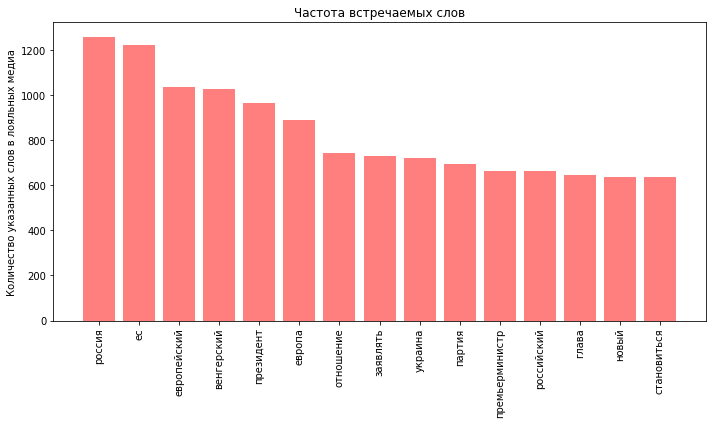

In [9]:
dic = defaultdict(int)
for word in corpus:
    if word not in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]

x, y = zip(*top)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='red', alpha=0.5)
plt.title('Частота встречаемых слов')
plt.xticks(rotation=90)
plt.ylabel('Количество указанных слов в лояльных медиа')
plt.tight_layout()
#plt.savefig('loyal.png', dpi=300);

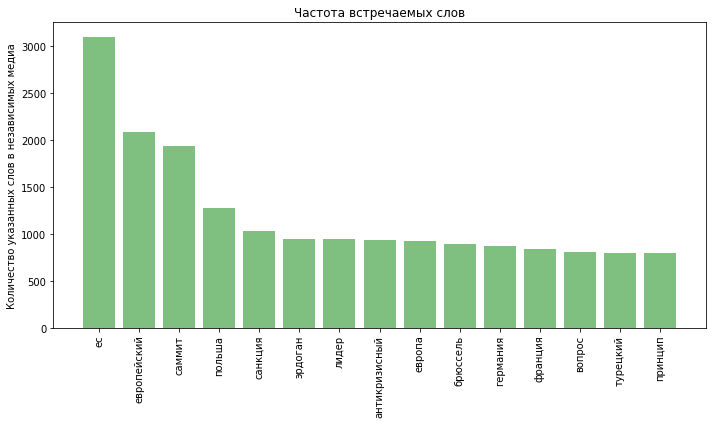

In [10]:
corpus = create_corpus('independent')

dic = defaultdict(int)
for word in corpus:
    if word not in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]

x, y = zip(*top)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='green', alpha=0.5)
plt.title('Частота встречаемых слов')
plt.xticks(rotation=90)
plt.ylabel('Количество указанных слов в независимых медиа')
plt.tight_layout()
#plt.savefig('independent.png', dpi=300);

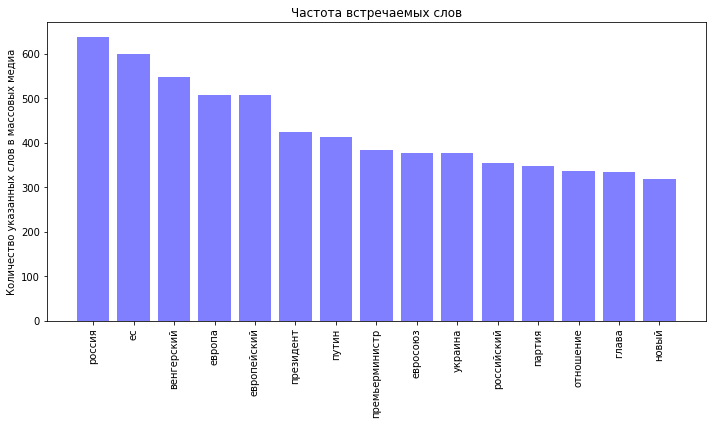

In [11]:
corpus = create_corpus('mass')

dic = defaultdict(int)
for word in corpus:
    if word not in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]

x, y = zip(*top)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue', alpha=0.5)
plt.title('Частота встречаемых слов')
plt.xticks(rotation=90)
plt.ylabel('Количество указанных слов в массовых медиа')
plt.tight_layout()
#plt.savefig('mass.png', dpi=300);

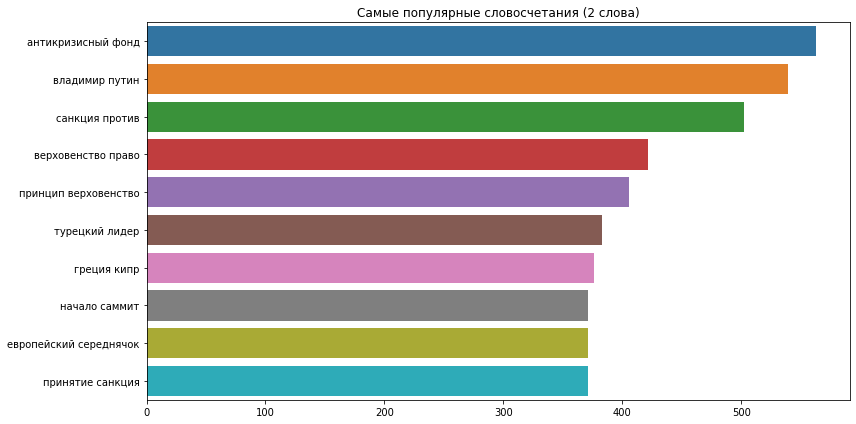

In [12]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(12, 6))
top_tweet_bigrams = get_top_tweet_bigrams(data['content'])[:10]
y, x = map(list, zip(*top_tweet_bigrams))
plot = sns.barplot(x=x, y=y).set_title('Самые популярные словосчетания (2 слова)')
plt.tight_layout()
#plt.savefig('two_words.png', dpi=300);

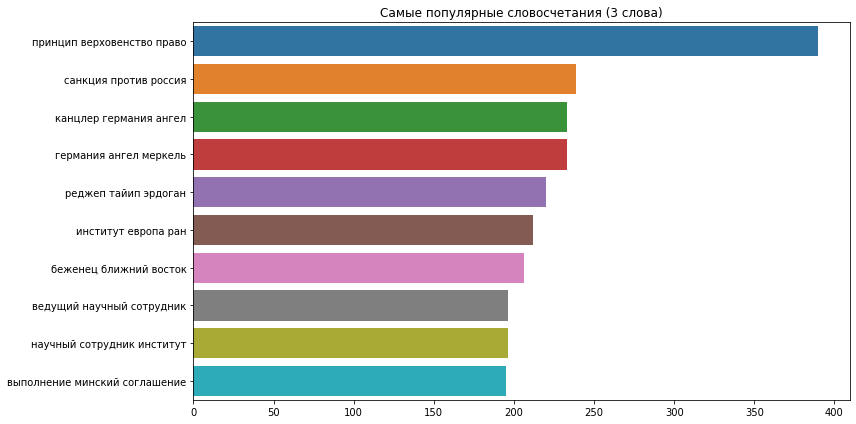

In [13]:
def get_top_tweet_threegrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(12, 6))
top_tweet_bigrams = get_top_tweet_threegrams(data['content'])[:10]
y, x = map(list, zip(*top_tweet_bigrams))
plot = sns.barplot(x=x, y=y).set_title('Самые популярные словосчетания (3 слова)')
plt.tight_layout()
#plt.savefig('three_words.png', dpi=300);

In [14]:
def create_corpus_year(target):
    """
    Эта функция создаст корпус (лист) слов, встречающихся в статьях. Корпус создаётся по году
    """
    corpus=[]
    
    for x in data[data['year'] == target]['content'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

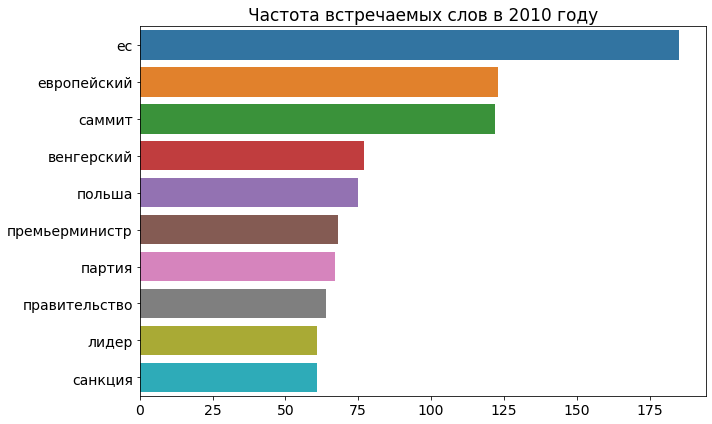

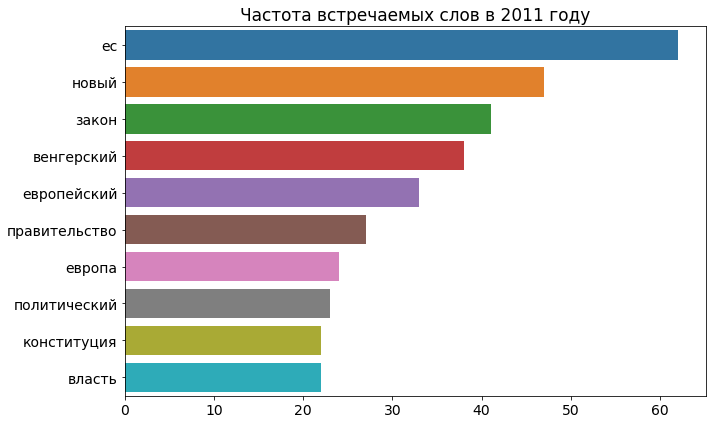

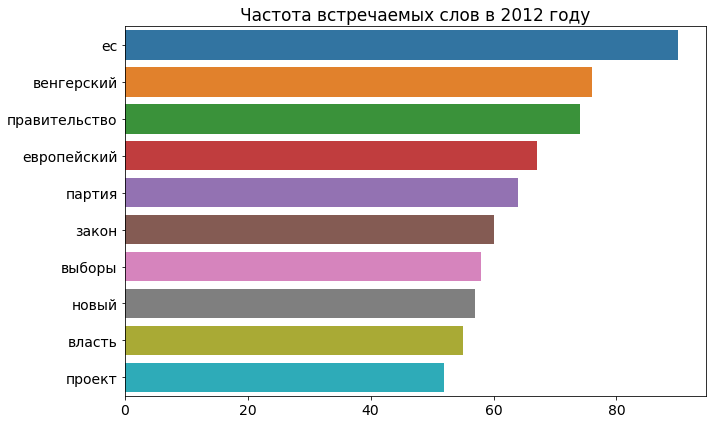

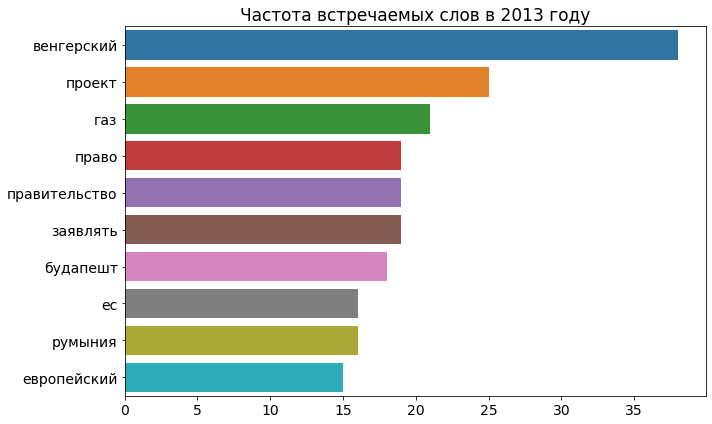

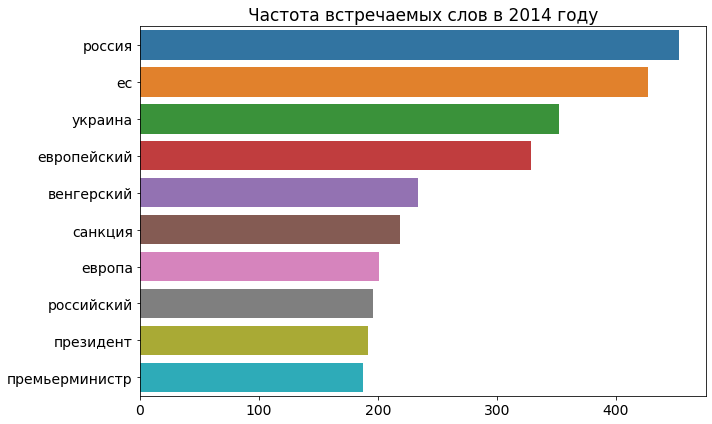

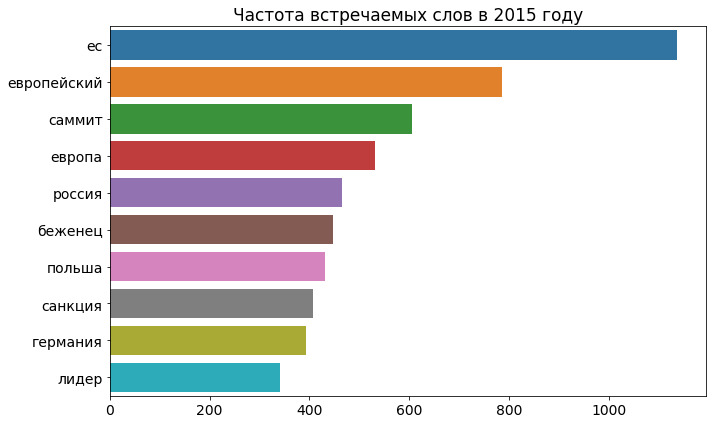

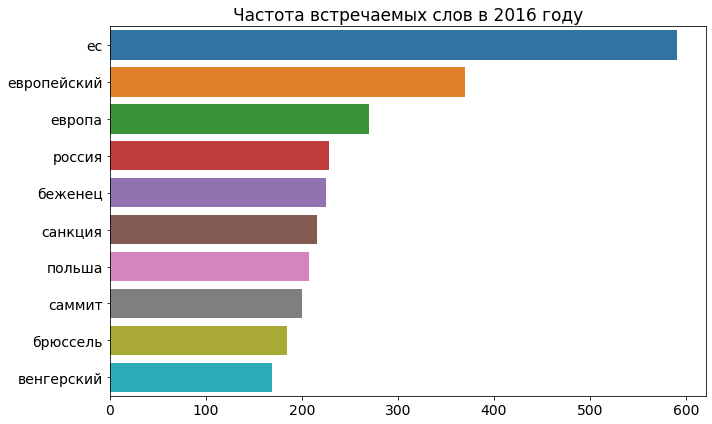

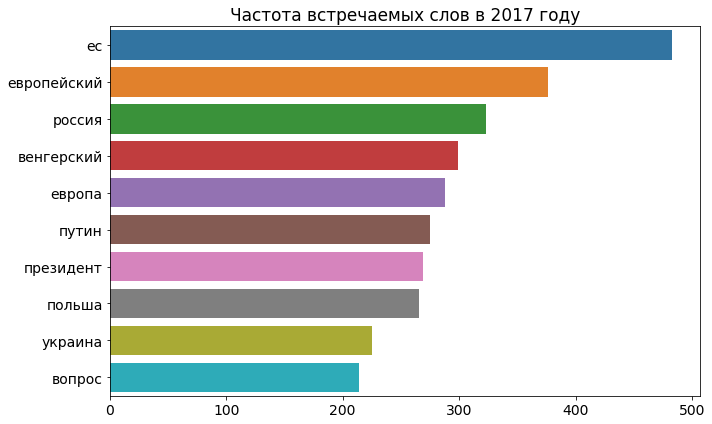

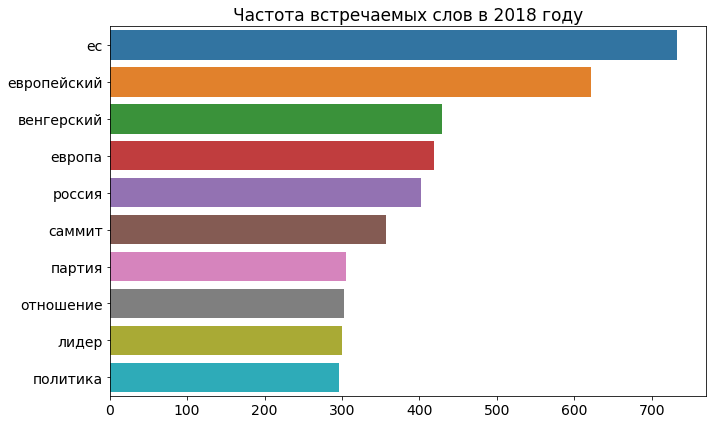

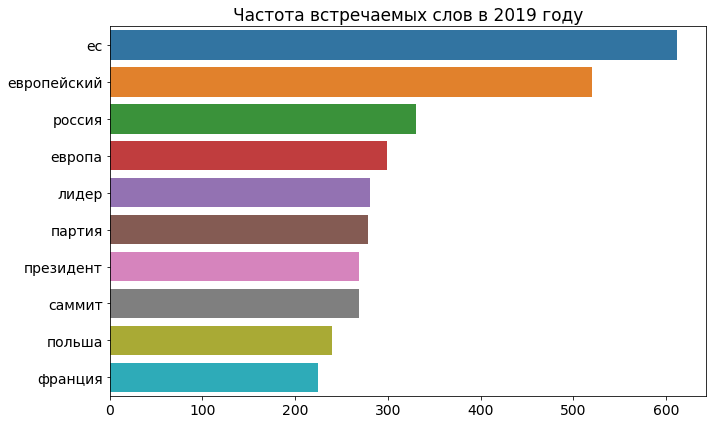

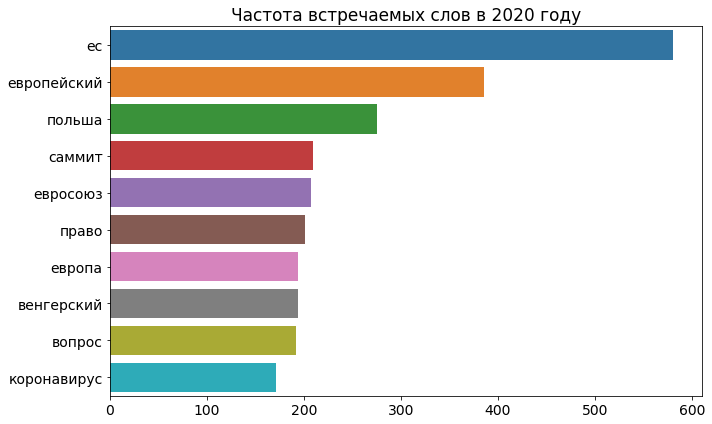

In [15]:
for i in range(2010, 2021):
    corpus = create_corpus_year(i)

    dic = defaultdict(int)
    for word in corpus:
        if word not in stopwords:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
    y, x = map(list, zip(*top))

    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x=x, y=y)
    plot.tick_params(labelsize=14)
    plot.set_title('Частота встречаемых слов в {} году'.format(i), fontsize=17);
    plt.tight_layout()
    #Раскомментирвоать, если нам нужно сохранить графики и списки слов по каждому году
    #plt.savefig('words{}.png'.format(i), dpi=300)
    #pd.DataFrame({'word': y, 'count': x}).to_excel('words_year_{}.xlsx'.format(i), index=False);